<a href="https://colab.research.google.com/github/dangkhoa152/3122410187_TranLeDangKhoa_DataAnalysis/blob/main/Chapter11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 11

In [ ]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

In [ ]:
import numpy as np
import pandas as pd

## Date and Time Data Types and Tools

In [ ]:
from datetime import datetime
now = datetime.now()
now
now.year, now.month, now.day

(2025, 9, 17)

In [ ]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta
delta.days
delta.seconds

56700

In [ ]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

## Converting Between String and Datetime

In [ ]:
stamp = datetime(2011, 1, 3)
str(stamp)
stamp.strftime("%Y-%m-%d")

'2011-01-03'

In [ ]:
value = "2011-01-03"
datetime.strptime(value, "%Y-%m-%d")
datestrs = ["7/6/2011", "8/6/2011"]
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [ ]:
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"]
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [ ]:
idx = pd.to_datetime(datestrs + [None])
idx
idx[2]
pd.isna(idx)

array([False, False,  True])

## Time Series Basics

In [ ]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.standard_normal(6), index=dates)
ts

,0
2011-01-02,-0.204708
2011-01-05,0.478943
2011-01-07,-0.519439
2011-01-08,-0.555730
2011-01-10,1.965781
2011-01-12,1.393406


In [ ]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
ts + ts[::2]

,0
2011-01-02,-0.409415
2011-01-05,NaN
2011-01-07,-1.038877
2011-01-08,NaN
2011-01-10,3.931561
2011-01-12,NaN


In [ ]:
ts.index.dtype

dtype('<M8[ns]')

In [ ]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

##Indexing, Selection, Subsetting

In [ ]:
stamp = ts.index[2]
ts[stamp]

np.float64(-0.5194387150567381)

In [ ]:
ts["2011-01-10"]

np.float64(1.9657805725027142)

In [ ]:
longer_ts = pd.Series(np.random.standard_normal(1000),
                      index=pd.date_range("2000-01-01", periods=1000))
longer_ts
longer_ts["2001"]

,0
2001-01-01,1.599534
2001-01-02,0.474071
2001-01-03,0.151326
2001-01-04,-0.542173
2001-01-05,-0.475496
...,...
2001-12-27,0.057874
2001-12-28,-0.433739
2001-12-29,0.092698
2001-12-30,-1.397820


In [ ]:
longer_ts["2001-05"]

,0
2001-05-01,-0.622547
2001-05-02,0.936289
2001-05-03,0.750018
2001-05-04,-0.056715
2001-05-05,2.300675
...,...
2001-05-27,0.235477
2001-05-28,0.111835
2001-05-29,-1.251504
2001-05-30,-2.949343


In [ ]:
ts[datetime(2011, 1, 7):]
ts[datetime(2011, 1, 7):datetime(2011, 1, 10)]

,0
2011-01-07,-0.519439
2011-01-08,-0.555730
2011-01-10,1.965781


In [ ]:
ts
ts["2011-01-06":"2011-01-11"]

,0
2011-01-07,-0.519439
2011-01-08,-0.555730
2011-01-10,1.965781


In [ ]:
ts.truncate(after="2011-01-09")

,0
2011-01-02,-0.204708
2011-01-05,0.478943
2011-01-07,-0.519439
2011-01-08,-0.555730


In [ ]:
dates = pd.date_range("2000-01-01", periods=100, freq="W-WED")
long_df = pd.DataFrame(np.random.standard_normal((100, 4)),
                       index=dates,
                       columns=["Colorado", "Texas",
                                "New York", "Ohio"])
long_df.loc["2001-05"]

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


##Time Series with Duplicate Indices

In [ ]:
dates = pd.DatetimeIndex(["2000-01-01", "2000-01-02", "2000-01-02",
                          "2000-01-02", "2000-01-03"])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

,0
2000-01-01,0
2000-01-02,1
2000-01-02,2
2000-01-02,3
2000-01-03,4


In [ ]:
dup_ts.index.is_unique

False

In [ ]:
dup_ts["2000-01-03"]  # not duplicated
dup_ts["2000-01-02"]  # duplicated

,0
2000-01-02,1
2000-01-02,2
2000-01-02,3


In [ ]:
grouped = dup_ts.groupby(level=0)
grouped.mean()
grouped.count()

,0
2000-01-01,1
2000-01-02,3
2000-01-03,1


##Date Ranges, Frequencies, and Shifting

In [ ]:
ts
resampler = ts.resample("D")
resampler

## Generating Date Ranges

In [ ]:
index = pd.date_range("2012-04-01", "2012-06-01")
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [ ]:
pd.date_range(start="2012-04-01", periods=20)
pd.date_range(end="2012-06-01", periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range("2000-01-01", "2000-12-01", freq="BM")

/tmp/ipython-input-3742551278.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  pd.date_range("2000-01-01", "2000-12-01", freq="BM")


DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BME')

In [ ]:
pd.date_range("2012-05-02 12:56:31", periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range("2012-05-02 12:56:31", periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

##Frequencies and Date Offsets

In [ ]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [ ]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [ ]:
pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")

/tmp/ipython-input-3449897904.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range("2000-01-01", "2000-01-03 23:59", freq="4H")


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [ ]:
Hour(2) + Minute(30)

<150 * Minutes>

In [ ]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90min')

##Week of month dates

In [ ]:
monthly_dates = pd.date_range("2012-01-01", "2012-09-01", freq="WOM-3FRI")
list(monthly_dates)

[Timestamp('2012-01-20 00:00:00'),
 Timestamp('2012-02-17 00:00:00'),
 Timestamp('2012-03-16 00:00:00'),
 Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-08-17 00:00:00')]

##Shifting (Leading and Lagging) Data

In [ ]:
ts = pd.Series(np.random.standard_normal(4),
               index=pd.date_range("2000-01-01", periods=4, freq="M"))
ts
ts.shift(2)
ts.shift(-2)

/tmp/ipython-input-2994308253.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range("2000-01-01", periods=4, freq="M"))


,0
2000-01-31,-0.117388
2000-02-29,-0.517795
2000-03-31,NaN
2000-04-30,NaN


In [ ]:
ts.shift(2, freq="M")

/tmp/ipython-input-903147437.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.shift(2, freq="M")


,0
2000-03-31,-0.066748
2000-04-30,0.838639
2000-05-31,-0.117388
2000-06-30,-0.517795


In [ ]:
ts.shift(3, freq="D")
ts.shift(1, freq="90T")

/tmp/ipython-input-4056683127.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ts.shift(1, freq="90T")


,0
2000-01-31 01:30:00,-0.066748
2000-02-29 01:30:00,0.838639
2000-03-31 01:30:00,-0.117388
2000-04-30 01:30:00,-0.517795


## Shifting dates with offsets


In [ ]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [ ]:
now + MonthEnd()
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [ ]:
offset = MonthEnd()
offset.rollforward(now)
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [ ]:
ts = pd.Series(np.random.standard_normal(20),
               index=pd.date_range("2000-01-15", periods=20, freq="4D"))
ts
ts.groupby(MonthEnd().rollforward).mean()

,0
2000-01-31,-0.005833
2000-02-29,0.015894
2000-03-31,0.150209


In [ ]:
ts.resample("M").mean()

/tmp/ipython-input-3978117481.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M").mean()


,0
2000-01-31,-0.005833
2000-02-29,0.015894
2000-03-31,0.150209


##Time Zone Handling

In [ ]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [ ]:
tz = pytz.timezone("America/New_York")
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

## Time Zone Localization and Conversion

In [ ]:
dates = pd.date_range("2012-03-09 09:30", periods=6)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts

,0
2012-03-09 09:30:00,-0.202469
2012-03-10 09:30:00,0.050718
2012-03-11 09:30:00,0.639869
2012-03-12 09:30:00,0.597594
2012-03-13 09:30:00,-0.797246
2012-03-14 09:30:00,0.472879


In [ ]:
print(ts.index.tz)

None


In [ ]:
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [ ]:
ts
ts_utc = ts.tz_localize("UTC")
ts_utc
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [ ]:
ts_utc.tz_convert("America/New_York")

,0
2012-03-09 04:30:00-05:00,-0.202469
2012-03-10 04:30:00-05:00,0.050718
2012-03-11 05:30:00-04:00,0.639869
2012-03-12 05:30:00-04:00,0.597594
2012-03-13 05:30:00-04:00,-0.797246
2012-03-14 05:30:00-04:00,0.472879


In [ ]:
ts_eastern = ts.tz_localize("America/New_York")
ts_eastern.tz_convert("UTC")
ts_eastern.tz_convert("Europe/Berlin")

,0
2012-03-09 15:30:00+01:00,-0.202469
2012-03-10 15:30:00+01:00,0.050718
2012-03-11 14:30:00+01:00,0.639869
2012-03-12 14:30:00+01:00,0.597594
2012-03-13 14:30:00+01:00,-0.797246
2012-03-14 14:30:00+01:00,0.472879


In [ ]:
ts.index.tz_localize("Asia/Shanghai")

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

##Operations with Time Zone-Aware Timestamp Objects

In [ ]:
stamp = pd.Timestamp("2011-03-12 04:00")
stamp_utc = stamp.tz_localize("utc")
stamp_utc.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [ ]:
stamp_moscow = pd.Timestamp("2011-03-12 04:00", tz="Europe/Moscow")
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [ ]:
stamp_utc.value
stamp_utc.tz_convert("America/New_York").value

1299902400000000000

In [ ]:
stamp = pd.Timestamp("2012-03-11 01:30", tz="US/Eastern")
stamp
stamp + Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [ ]:
stamp = pd.Timestamp("2012-11-04 00:30", tz="US/Eastern")
stamp
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

##Operations Between Different Time Zones

In [ ]:
dates = pd.date_range("2012-03-07 09:30", periods=10, freq="B")
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts
ts1 = ts[:7].tz_localize("Europe/London")
ts2 = ts1[2:].tz_convert("Europe/Moscow")
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

##Periods and Period Arithmetic

In [ ]:
p = pd.Period("2011", freq="A-DEC")
p

/tmp/ipython-input-520127536.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  p = pd.Period("2011", freq="A-DEC")


Period('2011', 'Y-DEC')

In [ ]:
p + 5
p - 2

Period('2009', 'Y-DEC')

In [ ]:
pd.Period("2014", freq="A-DEC") - p

/tmp/ipython-input-3816979827.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  pd.Period("2014", freq="A-DEC") - p


<3 * YearEnds: month=12>

In [ ]:
periods = pd.period_range("2000-01-01", "2000-06-30", freq="M")
periods

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [ ]:
pd.Series(np.random.standard_normal(6), index=periods)

,0
2000-01,-0.514551
2000-02,-0.559782
2000-03,-0.783408
2000-04,-1.797685
2000-05,-0.172670
2000-06,0.680215


In [ ]:
values = ["2001Q3", "2002Q2", "2003Q1"]
index = pd.PeriodIndex(values, freq="Q-DEC")
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

##Period Frequency Conversion

In [ ]:
p = pd.Period("2011", freq="A-DEC")
p
p.asfreq("M", how="start")
p.asfreq("M", how="end")
p.asfreq("M")

/tmp/ipython-input-3519524340.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  p = pd.Period("2011", freq="A-DEC")


Period('2011-12', 'M')

In [ ]:
p = pd.Period("2011", freq="A-JUN")
p
p.asfreq("M", how="start")
p.asfreq("M", how="end")

/tmp/ipython-input-1547579311.py:1: FutureWarning: 'A-JUN' is deprecated and will be removed in a future version, please use 'Y-JUN' instead.
  p = pd.Period("2011", freq="A-JUN")


Period('2011-06', 'M')

In [ ]:
p = pd.Period("Aug-2011", "M")
p.asfreq("A-JUN")

/tmp/ipython-input-2271097004.py:2: FutureWarning: 'A-JUN' is deprecated and will be removed in a future version, please use 'Y-JUN' instead.
  p.asfreq("A-JUN")


Period('2012', 'Y-JUN')

In [ ]:
periods = pd.period_range("2006", "2009", freq="A-DEC")
ts = pd.Series(np.random.standard_normal(len(periods)), index=periods)
ts
ts.asfreq("M", how="start")

/tmp/ipython-input-3858577534.py:1: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  periods = pd.period_range("2006", "2009", freq="A-DEC")


,0
2006-01,1.607578
2007-01,0.200381
2008-01,-0.834068
2009-01,-0.302988


In [ ]:
ts.asfreq("B", how="end")

/tmp/ipython-input-2984082239.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ts.asfreq("B", how="end")


,0
2006-12-29,1.607578
2007-12-31,0.200381
2008-12-31,-0.834068
2009-12-31,-0.302988


##Quarterly Period Frequencies

In [ ]:
p = pd.Period("2012Q4", freq="Q-JAN")
p

Period('2012Q4', 'Q-JAN')

In [ ]:
p.asfreq("D", how="start")
p.asfreq("D", how="end")

Period('2012-01-31', 'D')

In [ ]:
p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60
p4pm
p4pm.to_timestamp()

/tmp/ipython-input-1108768030.py:1: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60
/tmp/ipython-input-1108768030.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  p4pm = (p.asfreq("B", how="end") - 1).asfreq("T", how="start") + 16 * 60


Timestamp('2012-01-30 16:00:00')

In [ ]:
periods = pd.period_range("2011Q3", "2012Q4", freq="Q-JAN")
ts = pd.Series(np.arange(len(periods)), index=periods)
ts
new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16
ts.index = new_periods.to_timestamp()
ts

/tmp/ipython-input-142431650.py:4: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16
/tmp/ipython-input-142431650.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  new_periods = (periods.asfreq("B", "end") - 1).asfreq("H", "start") + 16


,0
2010-10-28 16:00:00,0
2011-01-28 16:00:00,1
2011-04-28 16:00:00,2
2011-07-28 16:00:00,3
2011-10-28 16:00:00,4
2012-01-30 16:00:00,5


##Converting Timestamps to Periods (and Back)

In [ ]:
dates = pd.date_range("2000-01-01", periods=3, freq="M")
ts = pd.Series(np.random.standard_normal(3), index=dates)
ts
pts = ts.to_period()
pts

/tmp/ipython-input-2638414699.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range("2000-01-01", periods=3, freq="M")


,0
2000-01,1.663261
2000-02,-0.996206
2000-03,1.521760


In [ ]:
dates = pd.date_range("2000-01-29", periods=6)
ts2 = pd.Series(np.random.standard_normal(6), index=dates)
ts2
ts2.to_period("M")

,0
2000-01,0.244175
2000-01,0.423331
2000-01,-0.654040
2000-02,2.089154
2000-02,-0.060220
2000-02,-0.167933


In [ ]:
pts = ts2.to_period()
pts
pts.to_timestamp(how="end")

,0
2000-01-29 23:59:59.999999999,0.244175
2000-01-30 23:59:59.999999999,0.423331
2000-01-31 23:59:59.999999999,-0.654040
2000-02-01 23:59:59.999999999,2.089154
2000-02-02 23:59:59.999999999,-0.060220
2000-02-03 23:59:59.999999999,-0.167933


##Creating a PeriodIndex from Arrays

In [ ]:
import pandas as pd
import statsmodels.api as sm

data = sm.datasets.macrodata.load_pandas().data
print(data.head())


     year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19  


In [ ]:
index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"],
                       freq="Q-DEC")
index
data.index = index
data["infl"]

/tmp/ipython-input-937729852.py:1: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  index = pd.PeriodIndex(year=data["year"], quarter=data["quarter"],


,infl
1959Q1,0.00
1959Q2,2.34
1959Q3,2.74
1959Q4,0.27
1960Q1,2.31
...,...
2008Q3,-3.16
2008Q4,-8.79
2009Q1,0.94
2009Q2,3.37


##Resampling and Frequency Conversion

In [ ]:
dates = pd.date_range("2000-01-01", periods=100)
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)
ts
ts.resample("M").mean()
ts.resample("M", kind="period").mean()

/tmp/ipython-input-1299626178.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M").mean()
/tmp/ipython-input-1299626178.py:5: FutureWarning: The 'kind' keyword in Series.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  ts.resample("M", kind="period").mean()
/tmp/ipython-input-1299626178.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.resample("M", kind="period").mean()


,0
2000-01,-0.165893
2000-02,0.078606
2000-03,0.223811
2000-04,-0.063643


##Downsampling

In [ ]:
dates = pd.date_range("2000-01-01", periods=12, freq="T")
ts = pd.Series(np.arange(len(dates)), index=dates)
ts

/tmp/ipython-input-4187085644.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range("2000-01-01", periods=12, freq="T")


,0
2000-01-01 00:00:00,0
2000-01-01 00:01:00,1
2000-01-01 00:02:00,2
2000-01-01 00:03:00,3
2000-01-01 00:04:00,4
2000-01-01 00:05:00,5
2000-01-01 00:06:00,6
2000-01-01 00:07:00,7
2000-01-01 00:08:00,8
2000-01-01 00:09:00,9


In [ ]:
ts.resample("5min").sum()

,0
2000-01-01 00:00:00,10
2000-01-01 00:05:00,35
2000-01-01 00:10:00,21


In [ ]:
ts.resample("5min", closed="right").sum()

,0
1999-12-31 23:55:00,0
2000-01-01 00:00:00,15
2000-01-01 00:05:00,40
2000-01-01 00:10:00,11


In [ ]:
ts.resample("5min", closed="right", label="right").sum()

,0
2000-01-01 00:00:00,0
2000-01-01 00:05:00,15
2000-01-01 00:10:00,40
2000-01-01 00:15:00,11


In [ ]:
from pandas.tseries.frequencies import to_offset
result = ts.resample("5min", closed="right", label="right").sum()
result.index = result.index + to_offset("-1s")
result

,0
1999-12-31 23:59:59,0
2000-01-01 00:04:59,15
2000-01-01 00:09:59,40
2000-01-01 00:14:59,11


In [ ]:
ts = pd.Series(np.random.permutation(np.arange(len(dates))), index=dates)
ts.resample("5min").ohlc()

,open,high,low,close
2000-01-01 00:00:00,8,8,1,5
2000-01-01 00:05:00,6,11,2,2
2000-01-01 00:10:00,0,7,0,7


##Upsampling and Interpolation

In [ ]:
frame = pd.DataFrame(np.random.standard_normal((2, 4)),
                     index=pd.date_range("2000-01-01", periods=2,
                                         freq="W-WED"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.927238,0.482284,-0.867130
2000-01-12,0.493841,-0.155434,1.397286,1.507055


In [ ]:
df_daily = frame.resample("D").asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.927238,0.482284,-0.867130
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.493841,-0.155434,1.397286,1.507055


In [ ]:
frame.resample("D").ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.927238,0.482284,-0.867130
2000-01-06,-0.896431,0.927238,0.482284,-0.867130
2000-01-07,-0.896431,0.927238,0.482284,-0.867130
2000-01-08,-0.896431,0.927238,0.482284,-0.867130
2000-01-09,-0.896431,0.927238,0.482284,-0.867130
2000-01-10,-0.896431,0.927238,0.482284,-0.867130
2000-01-11,-0.896431,0.927238,0.482284,-0.867130
2000-01-12,0.493841,-0.155434,1.397286,1.507055


In [ ]:
frame.resample("D").ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.927238,0.482284,-0.867130
2000-01-06,-0.896431,0.927238,0.482284,-0.867130
2000-01-07,-0.896431,0.927238,0.482284,-0.867130
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.493841,-0.155434,1.397286,1.507055


In [ ]:
frame.resample("W-THU").ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.896431,0.927238,0.482284,-0.867130
2000-01-13,0.493841,-0.155434,1.397286,1.507055


##Resampling with Periods

In [ ]:
frame = pd.DataFrame(np.random.standard_normal((24, 4)),
                     index=pd.period_range("1-2000", "12-2001",
                                           freq="M"),
                     columns=["Colorado", "Texas", "New York", "Ohio"])
frame.head()
annual_frame = frame.resample("A-DEC").mean()
annual_frame

/tmp/ipython-input-2743538330.py:6: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'Y-DEC' instead.
  annual_frame = frame.resample("A-DEC").mean()
/tmp/ipython-input-2743538330.py:6: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame = frame.resample("A-DEC").mean()


,Colorado,Texas,New York,Ohio
2000,0.487329,0.104466,0.020495,-0.273945
2001,0.203125,0.162429,0.056146,-0.103794


In [ ]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample("Q-DEC").ffill()
annual_frame.resample("Q-DEC", convention="end").asfreq()

/tmp/ipython-input-162139083.py:2: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC").ffill()
/tmp/ipython-input-162139083.py:3: FutureWarning: The 'convention' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast PeriodIndex to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC", convention="end").asfreq()
/tmp/ipython-input-162139083.py:3: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-DEC", convention="end").asfreq()


,Colorado,Texas,New York,Ohio
2000Q4,0.487329,0.104466,0.020495,-0.273945
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.203125,0.162429,0.056146,-0.103794


In [ ]:
annual_frame.resample("Q-MAR").ffill()

/tmp/ipython-input-70909838.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample("Q-MAR").ffill()


,Colorado,Texas,New York,Ohio
2000Q4,0.487329,0.104466,0.020495,-0.273945
2001Q1,0.487329,0.104466,0.020495,-0.273945
2001Q2,0.487329,0.104466,0.020495,-0.273945
2001Q3,0.487329,0.104466,0.020495,-0.273945
2001Q4,0.203125,0.162429,0.056146,-0.103794
2002Q1,0.203125,0.162429,0.056146,-0.103794
2002Q2,0.203125,0.162429,0.056146,-0.103794
2002Q3,0.203125,0.162429,0.056146,-0.103794


##Grouped Time Resampling

In [ ]:
N = 15
times = pd.date_range("2017-05-20 00:00", freq="1min", periods=N)
df = pd.DataFrame({"time": times,
                   "value": np.arange(N)})
df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [ ]:
df.set_index("time").resample("5min").count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [ ]:
df2 = pd.DataFrame({"time": times.repeat(3),
                    "key": np.tile(["a", "b", "c"], N),
                    "value": np.arange(N * 3.)})
df2.head(7)

,time,key,value
0,2017-05-20 00:00:00,a,0.0
1,2017-05-20 00:00:00,b,1.0
2,2017-05-20 00:00:00,c,2.0
3,2017-05-20 00:01:00,a,3.0
4,2017-05-20 00:01:00,b,4.0
5,2017-05-20 00:01:00,c,5.0
6,2017-05-20 00:02:00,a,6.0


In [ ]:
time_key = pd.Grouper(freq="5min")

In [ ]:
resampled = (df2.set_index("time")
             .groupby(["key", time_key])
             .sum())
resampled
resampled.reset_index()

,key,time,value
0,a,2017-05-20 00:00:00,30.0
1,a,2017-05-20 00:05:00,105.0
2,a,2017-05-20 00:10:00,180.0
3,b,2017-05-20 00:00:00,35.0
4,b,2017-05-20 00:05:00,110.0
5,b,2017-05-20 00:10:00,185.0
6,c,2017-05-20 00:00:00,40.0
7,c,2017-05-20 00:05:00,115.0
8,c,2017-05-20 00:10:00,190.0


##Moving Window Functions

In [104]:
!pip install yfinance --quiet
import yfinance as yf

tickers = ["AAPL", "MSFT", "XOM"]
close_px_all = yf.download(tickers, start="2011-01-01", end="2011-12-31")["Close"]
print(close_px_all.head())


/tmp/ipython-input-926744075.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  close_px_all = yf.download(tickers, start="2011-01-01", end="2011-12-31")["Close"]
[*********************100%***********************]  3 of 3 completed

Ticker           AAPL       MSFT        XOM
Date                                       
2011-01-03   9.893728  21.385925  42.311073
2011-01-04   9.945362  21.469999  42.509724
2011-01-05  10.026719  21.401215  42.396210
2011-01-06  10.018614  22.027962  42.668621
2011-01-07  10.090358  21.859814  42.901340


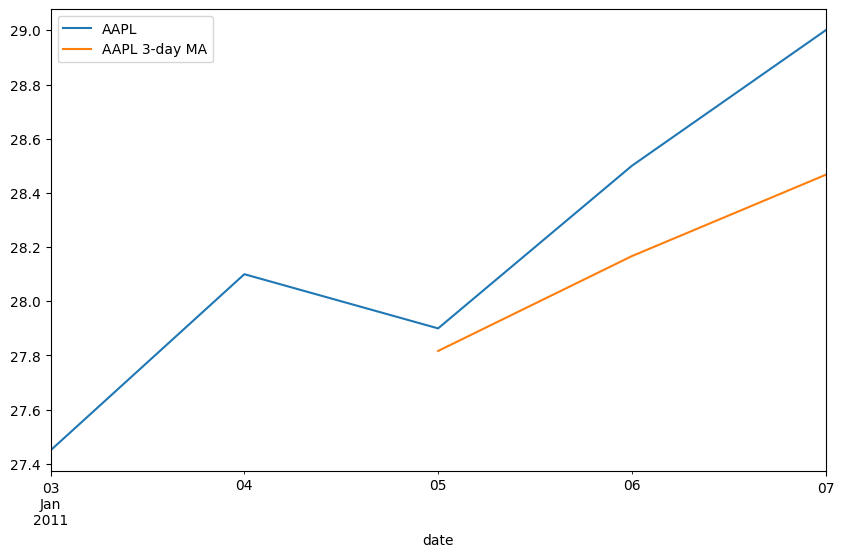

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Dữ liệu giả
csv_data = """date,AAPL,MSFT,XOM
2011-01-03,27.45,25.30,45.20
2011-01-04,28.10,25.60,45.50
2011-01-05,27.90,25.80,45.10
2011-01-06,28.50,26.10,45.80
2011-01-07,29.00,26.30,46.00
"""

with open("stock_px.csv", "w") as f:
    f.write(csv_data)

# Đọc dữ liệu
close_px_all = pd.read_csv("stock_px.csv", parse_dates=["date"], index_col="date")
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]

# Vẽ biểu đồ
close_px["AAPL"].plot(label="AAPL")
close_px["AAPL"].rolling(3).mean().plot(label="AAPL 3-day MA")  # rolling trung bình
plt.legend()
plt.show()


<Axes: xlabel='date'>

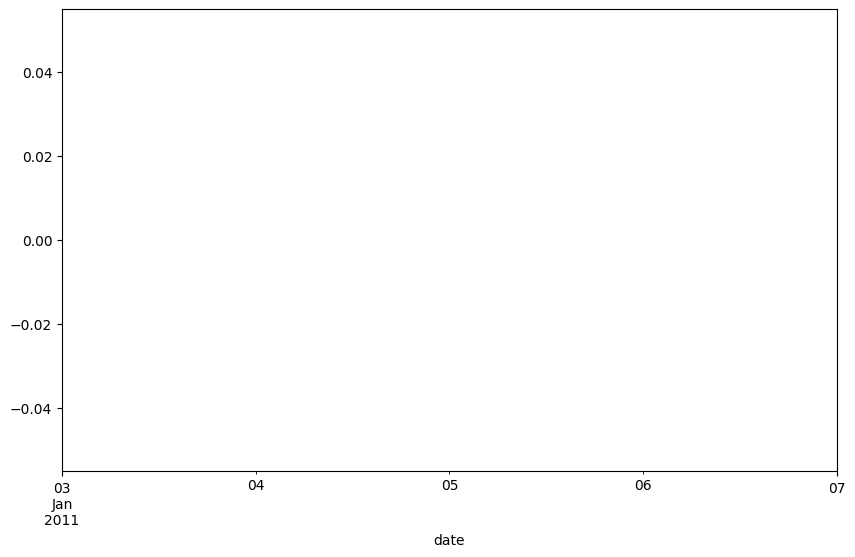

In [107]:
plt.figure()
std250 = close_px["AAPL"].pct_change().rolling(250, min_periods=10).std()
std250[5:12]
std250.plot()

In [108]:
expanding_mean = std250.expanding().mean()

In [109]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='date'>

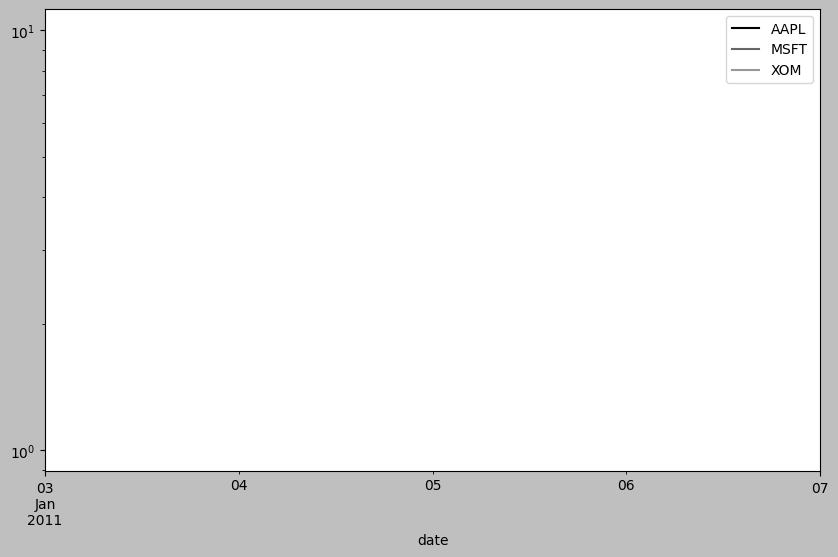

In [110]:
plt.style.use('grayscale')
close_px.rolling(60).mean().plot(logy=True)

In [111]:
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
date,,,
2011-01-03,27.450000,25.300000,45.200000
2011-01-04,27.775000,25.450000,45.350000
2011-01-05,27.816667,25.566667,45.266667
2011-01-06,27.987500,25.700000,45.400000
2011-01-07,28.190000,25.820000,45.520000


In [112]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

##Exponentially Weighted Functions

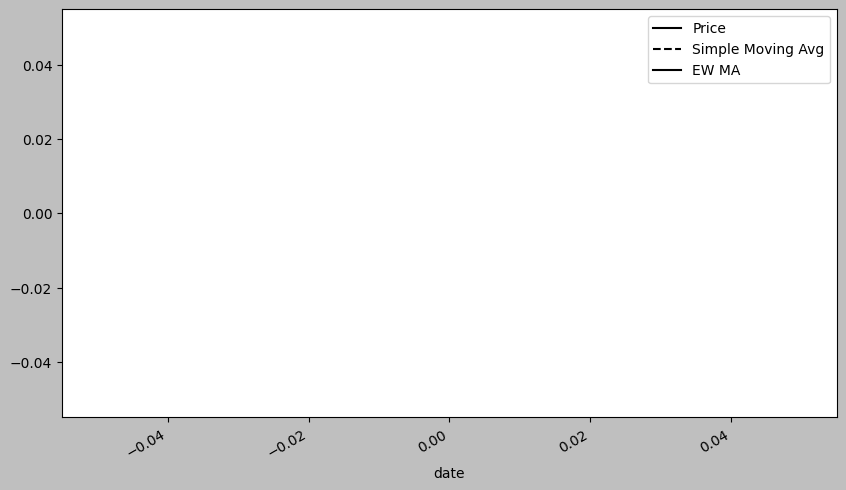

In [113]:
aapl_px = close_px["AAPL"]["2006":"2007"]

ma30 = aapl_px.rolling(30, min_periods=20).mean()
ewma30 = aapl_px.ewm(span=30).mean()

aapl_px.plot(style="k-", label="Price")
ma30.plot(style="k--", label="Simple Moving Avg")
ewma30.plot(style="k-", label="EW MA")
plt.legend()

In [114]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

##Binary Moving Window Functions

/tmp/ipython-input-47877746.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  close_px_all = yf.download(tickers, start="2003-01-01", end="2011-12-31")["Close"]
[*********************100%***********************]  4 of 4 completed


Ticker          AAPL       MSFT        XOM         SPX
Date                                                  
2003-01-02  0.222149  16.438303  16.873747  909.030029
2003-01-03  0.223649  16.459724  16.888018  908.590027
2003-01-06  0.223649  16.759598  17.306650  929.010010
2003-01-07  0.222900  17.074783  16.721521  922.929993
2003-01-08  0.218396  16.597420  16.650160  909.929993


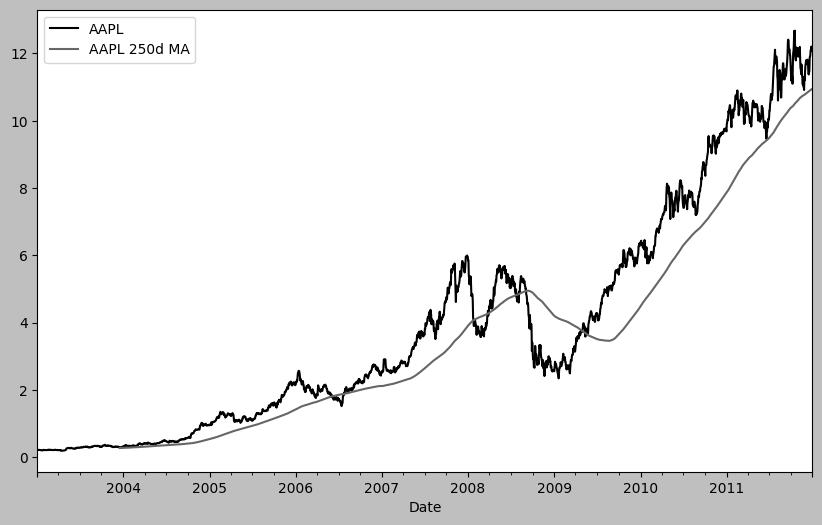

In [116]:
!pip install yfinance --quiet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Danh sách ticker
tickers = ["AAPL", "MSFT", "XOM", "^GSPC"]

# Tải dữ liệu từ 2003 đến 2011 (giống sách)
close_px_all = yf.download(tickers, start="2003-01-01", end="2011-12-31")["Close"]

# Đổi tên ^GSPC thành SPX
close_px_all = close_px_all.rename(columns={"^GSPC": "SPX"})

# Lấy subset như trong sách
close_px = close_px_all[["AAPL", "MSFT", "XOM", "SPX"]]

# Chuẩn hóa theo ngày làm việc (Business day)
close_px = close_px.resample("B").ffill()

# Kiểm tra dữ liệu
print(close_px.head())

# Ví dụ: vẽ biểu đồ AAPL và đường trung bình 250 ngày
close_px["AAPL"].plot(label="AAPL")
close_px["AAPL"].rolling(250).mean().plot(label="AAPL 250d MA")
plt.legend()
plt.show()


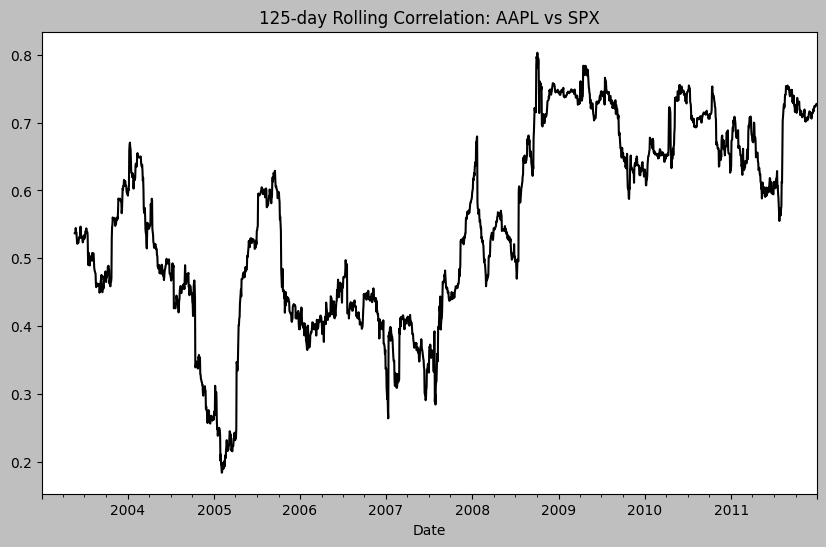

In [118]:
import numpy as np

# Tính log-return (hoặc pct_change cũng được)
returns = close_px.pct_change()   # hoặc: np.log(close_px / close_px.shift(1))

# Return của SPX
spx_rets = returns["SPX"]

# Rolling correlation giữa AAPL và SPX
corr = returns["AAPL"].rolling(125, min_periods=100).corr(spx_rets)

corr.plot(title="125-day Rolling Correlation: AAPL vs SPX")
plt.show()


In [119]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Date'>

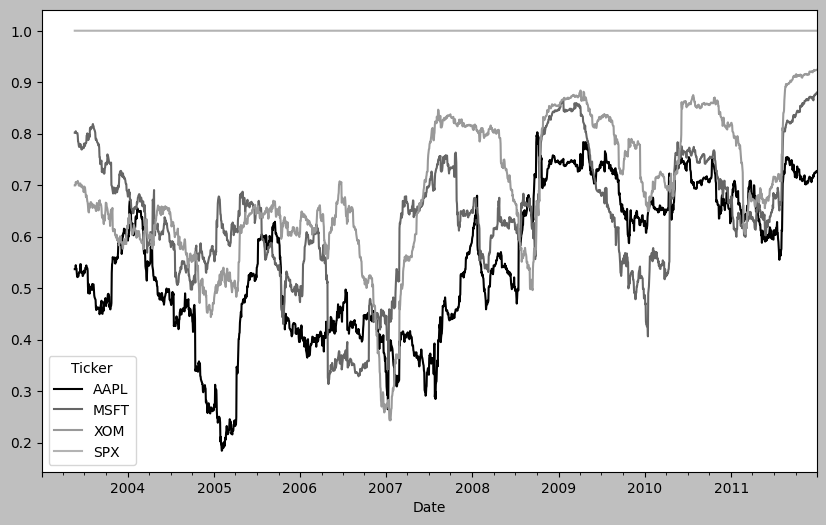

In [120]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [121]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

##User-Defined Moving Window Functions

<Axes: xlabel='Date'>

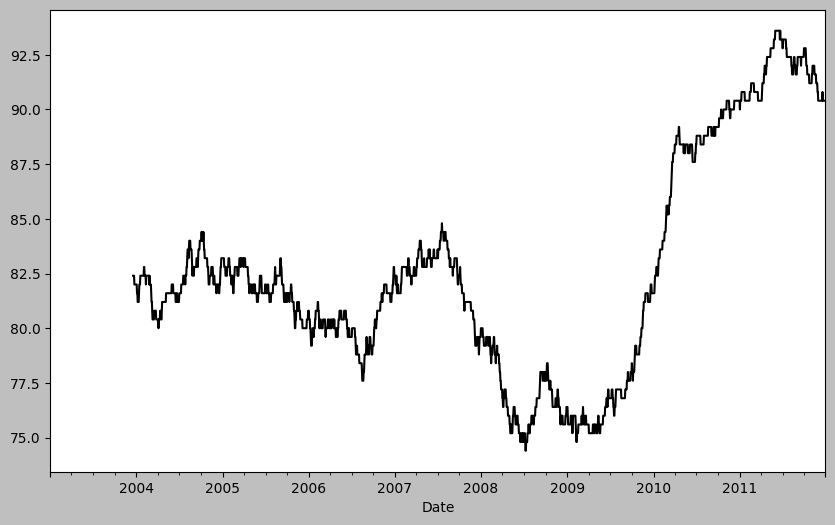

In [122]:
from scipy.stats import percentileofscore
def score_at_2percent(x):
    return percentileofscore(x, 0.02)

result = returns["AAPL"].rolling(250).apply(score_at_2percent)
result.plot()

In [123]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS